<a href="https://colab.research.google.com/github/felixyuzhenyang/MSSP-6070-YuzhenYang/blob/main/Assignments/Final_Project/Final_Project_YuzhenYang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 0: Environment Setup

In [1]:
# !rm -rf /content/*

In [2]:
!pip install stargazer

In [3]:
!pip install geopandas folium mapclassify matplotlib seaborn pandas

In [4]:
!pip install geopandas folium matplotlib pandas

In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from shapely.geometry import Point
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['axes.formatter.limits'] = (-5, 5)
sns.set_context("notebook", font_scale=1.5)

In [6]:
from google.colab import userdata
import os
os.chdir('/content')
github_token = userdata.get('GitHub_MSSP6070')
owner = 'felixyuzhenyang'
repository = 'MSSP-6070-YuzhenYang'

clone_url = f'https://{github_token}@github.com/{owner}/{repository}.git'

!git clone {clone_url}

Cloning into 'MSSP-6070-YuzhenYang'...
remote: Enumerating objects: 461, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 461 (delta 57), reused 42 (delta 26), pack-reused 351 (from 2)
Receiving objects: 100% (461/461), 38.07 MiB | 13.75 MiB/s, done.
Resolving deltas: 100% (250/250), done.


In [7]:
import warnings
working_directory = "/content/MSSP-6070-YuzhenYang/data/data_final_project"

pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 160)
warnings.filterwarnings("ignore")

try:
    os.chdir(working_directory)
    print(f"New working path successfully set: {os.getcwd()}")
except FileNotFoundError:
    print(f"error: path not exist: {working_directory}")

New working path successfully set: /content/MSSP-6070-YuzhenYang/data/data_final_project


# Part 1: Data Cleaning and Processing

## 1. Read Data

In [8]:
##### 1. Read Airbnb Data of Hong Kong Island & Kowloon

LISTINGS_ISLAND_FILE   = "Listings_Data_HKIsland.csv"
LISTINGS_KOWLOON_FILE  = "Listings_Data_HKKowloon.csv"
CAL_ISLAND_FILE        = "Past_Calendar_Rates_HKIsland.csv"
CAL_KOWLOON_FILE       = "Past_Calendar_Rates_HKKowloon.csv"
HK_BOUNDARY_FILE       = "district_boundary_HK.json"

listings_island  = pd.read_csv(LISTINGS_ISLAND_FILE, low_memory=False)
listings_kowloon = pd.read_csv(LISTINGS_KOWLOON_FILE, low_memory=False)

calendar_island  = pd.read_csv(CAL_ISLAND_FILE, low_memory=False)
calendar_kowloon = pd.read_csv(CAL_KOWLOON_FILE, low_memory=False)

In [9]:
print("Hong Kong Island listings shape:", listings_island.shape)
print("Kowloon listings shape:", listings_kowloon.shape)
print("Hong Kong Island calendar shape:", calendar_island.shape)
print("Kowloon calendar shape:", calendar_kowloon.shape)

Hong Kong Island listings shape: (218, 62)
Kowloon listings shape: (283, 62)
Hong Kong Island calendar shape: (2426, 14)
Kowloon calendar shape: (3191, 14)


In [10]:
print("\n===== listings_island.head() =====")
display(listings_island.head())
print("\n===== listings_kowloon.head() =====")
display(listings_kowloon.head())


===== listings_island.head() =====


,listing_id,listing_name,listing_type,room_type,cover_photo_url,photos_count,host_id,host_name,cohost_ids,cohost_names,superhost,latitude,longitude,guests,bedrooms,beds,baths,registration,amenities,instant_book,professional_management,min_nights,cancellation_policy,currency,cleaning_fee,extra_guest_fee,num_reviews,rating_overall,rating_accuracy,rating_checkin,rating_cleanliness,rating_communication,rating_location,rating_value,ttm_revenue,ttm_revenue_native,ttm_avg_rate,ttm_avg_rate_native,ttm_occupancy,ttm_adjusted_occupancy,ttm_revpar,ttm_revpar_native,ttm_adjusted_revpar,ttm_adjusted_revpar_native,ttm_reserved_days,ttm_blocked_days,ttm_available_days,ttm_total_days,l90d_revenue,l90d_revenue_native,l90d_avg_rate,l90d_avg_rate_native,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_revpar_native,l90d_adjusted_revpar,l90d_adjusted_revpar_native,l90d_reserved_days,l90d_blocked_days,l90d_available_days,l90d_total_days
0,248140,Bright Studio - Soho - Central HK,Entire rental unit,entire_home,https://a0.muscache.com/im/pictures/4e5463bc-3...,18,1300549,NaN,NaN,NaN,False,22.2823,114.1492,2,1,1,1.0,NaN,"Elevator,Kitchen,Wifi,Dryer,Heating,Hangers,Ir...",NaN,NaN,3,Moderate,CNY,0.0,0.0,213,4.89,4.9,4.9,4.9,5.0,4.7,4.8,18548.0,134394.0,109.2,788.7,0.468,0.480,50.8,368.2,52.1,377.5,171,9,194,365,0.0,0.0,109.4,787.9,0.000,0.0,0.0,0.0,0.0,0.0,0,0,90,90
1,274589,"8 mins HKCEC, 5 mins MTR Wan Chai, nr Causeway...",Entire rental unit,entire_home,https://z1.muscache.cn/im/pictures/miso/Hostin...,49,1435069,NaN,NaN,NaN,True,22.2792,114.1700,4,2,3,1.0,NaN,"Elevator,Kitchen,Wifi,Dryer,Cable TV,Heating,H...",NaN,NaN,4,Strict,CNY,70.0,NaN,301,4.77,4.8,4.9,4.8,4.9,4.7,4.6,8185.0,59005.0,150.3,1087.1,0.129,0.000,22.4,161.7,0.0,0.0,47,0,318,365,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0,0,90,90
2,505456,GREEN NEST IN SHEUNG WAN HEART,Entire rental unit,entire_home,https://a0.muscache.com/im/pictures/6123969/bb...,19,1189239,NaN,NaN,NaN,True,22.2854,114.1489,4,1,2,1.0,NaN,"Elevator,Kitchen,Wifi,Dryer,Cable TV,Heating,D...",NaN,NaN,1,Strict,CNY,63.0,0.0,295,4.71,4.8,4.9,4.8,4.8,4.8,4.6,18978.0,137320.0,123.8,894.4,0.444,0.000,52.0,376.2,0.0,0.0,162,0,203,365,384.0,2766.0,134.0,965.7,0.033,0.0,4.3,30.7,0.0,0.0,3,0,87,90
3,792974,STUDIO with ROOF in HEART of SOHO,Entire rental unit,entire_home,https://a0.muscache.com/im/pictures/11258926/2...,60,2172438,NaN,NaN,NaN,True,22.2804,114.1506,2,0,2,1.0,NaN,"Kitchen,Wifi,Dryer,Heating,Dedicated workspace...",NaN,NaN,14,Strict,CNY,49.0,42.0,48,4.81,4.9,4.8,4.8,4.9,5.0,4.7,21177.0,153339.0,146.5,1058.7,0.384,0.453,58.0,420.1,68.5,496.2,140,56,225,365,0.0,0.0,140.2,1010.0,0.000,0.0,0.0,0.0,0.0,0.0,0,0,90,90
4,849316,Causeway Bay Nr Times Sq: Full Apartment,Entire rental unit,entire_home,https://a0.muscache.com/im/pictures/fb52f8df-2...,16,4414395,NaN,NaN,NaN,True,22.2770,114.1820,3,1,1,1.0,NaN,"Free parking on premises,Kitchen,Wifi,Dryer,Ca...",NaN,NaN,1,Flexible,CNY,0.0,0.0,109,4.55,4.6,4.8,4.5,4.8,4.9,4.5,12563.0,90766.0,119.6,863.9,0.310,0.328,34.4,248.7,36.4,263.1,113,20,252,365,0.0,0.0,133.5,961.9,0.000,0.0,0.0,0.0,0.0,0.0,0,0,90,90



===== listings_kowloon.head() =====


,listing_id,listing_name,listing_type,room_type,cover_photo_url,photos_count,host_id,host_name,cohost_ids,cohost_names,superhost,latitude,longitude,guests,bedrooms,beds,baths,registration,amenities,instant_book,professional_management,min_nights,cancellation_policy,currency,cleaning_fee,extra_guest_fee,num_reviews,rating_overall,rating_accuracy,rating_checkin,rating_cleanliness,rating_communication,rating_location,rating_value,ttm_revenue,ttm_revenue_native,ttm_avg_rate,ttm_avg_rate_native,ttm_occupancy,ttm_adjusted_occupancy,ttm_revpar,ttm_revpar_native,ttm_adjusted_revpar,ttm_adjusted_revpar_native,ttm_reserved_days,ttm_blocked_days,ttm_available_days,ttm_total_days,l90d_revenue,l90d_revenue_native,l90d_avg_rate,l90d_avg_rate_native,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_revpar_native,l90d_adjusted_revpar,l90d_adjusted_revpar_native,l90d_reserved_days,l90d_blocked_days,l90d_available_days,l90d_total_days
0,645404,Creative Residence in Kowloon . WM (Monthly),Shared room,shared_room,https://a0.muscache.com/im/pictures/94016828/4...,20,634820,Wontonmeen,NaN,NaN,True,22.3253,114.1643,NaN,NaN,1,2.5,False,"Wifi,Air conditioning,Smoking allowed,Hot wate...",False,NaN,1,Strict,CNY,0.0,0.0,220,4.68,4.6,4.8,4.6,4.7,4.7,4.7,2511.0,18114.0,24.6,177.5,0.192,0.208,6.9,49.6,7.5,53.9,70,29,295,365,0.0,0.0,12.0,86.4,0.000,0.000,0.0,0.0,0.0,0.0,0,26,90,90
1,646645,Creative Residence. Private Room (Monthly),Private room in hostel,private_room,https://a0.muscache.com/im/pictures/miso/Hosti...,8,634820,Wontonmeen,NaN,NaN,True,22.3253,114.1643,NaN,NaN,1,0.0,False,"Smoke alarm,Wifi,Air conditioning,Fire extingu...",False,NaN,3,Strict,CNY,0.0,0.0,39,4.56,4.7,4.5,4.5,4.7,4.5,4.7,683.0,4915.0,40.4,291.8,0.055,0.061,1.9,13.5,2.1,15.0,20,37,345,365,0.0,0.0,21.5,155.1,0.000,0.000,0.0,0.0,0.0,0.0,0,0,90,90
2,728122,Twin bed room for budget travellers,Private room in rental unit,private_room,https://z1.muscache.cn/im/pictures/miso/Hostin...,16,3784841,NaN,NaN,NaN,False,22.3181,114.1708,2.0,1.0,2,1.0,NaN,"Elevator,Kitchen,Wifi,Dryer,Heating,Dedicated ...",NaN,NaN,28,Flexible,CNY,0.0,0.0,13,4.17,4.2,4.4,3.9,4.5,4.7,3.9,3256.0,23591.0,33.6,242.7,0.230,0.488,8.9,64.6,18.9,137.2,84,193,281,365,0.0,0.0,26.0,187.0,0.000,0.000,0.0,0.0,0.0,0.0,0,90,90,90
3,736732,1 min to ladies market 2 rooms fit 6 ppls,Entire rental unit,entire_home,https://a0.muscache.com/im/pictures/9da8566c-2...,23,3800609,NaN,NaN,NaN,True,22.3203,114.1720,6.0,2.0,3,1.0,NaN,"Elevator,Kitchen,Wifi,Dryer,Cable TV,Heating,H...",NaN,NaN,1,NaN,CNY,0.0,0.0,117,4.61,4.5,4.6,4.6,4.8,4.8,4.5,22275.0,161032.0,143.5,1037.0,0.433,0.436,61.0,441.2,61.5,444.8,158,3,207,365,0.0,0.0,145.2,1046.3,0.000,0.000,0.0,0.0,0.0,0.0,0,0,90,90
4,926138,Lovely home Mong Kok MTR Railway 4 beds,Entire rental unit,entire_home,https://z1.muscache.cn/im/pictures/96e8827b-60...,41,4971086,NaN,NaN,NaN,True,22.3230,114.1710,6.0,2.0,4,1.0,NaN,"Elevator,Kitchen,Wifi,Dryer,Cable TV,Heating,D...",NaN,NaN,11,NaN,CNY,31.0,0.0,454,4.76,4.8,4.8,4.8,4.8,4.8,4.7,35614.0,257517.0,169.0,1220.9,0.581,0.658,97.6,705.5,110.6,799.7,212,43,153,365,4233.0,30497.0,176.8,1273.4,0.267,0.333,47.0,338.9,58.8,423.6,24,18,66,90


In [11]:
print("\n===== calendar_island.head() =====")
display(calendar_island.head())
print("\n===== calendar_kowloon.head() =====")
display(calendar_kowloon.head())


===== calendar_island.head() =====


,listing_id,date,vacant_days,reserved_days,occupancy,revenue,rate_avg,booked_rate_avg,booking_lead_time_avg,length_of_stay_avg,min_nights_avg,native_booked_rate_avg,native_rate_avg,native_revenue
0,845331029643398999,2024-11-01,4,26,0.867,2910.0,111.7,111.9,79.0,4.0,NaN,797.0,796.0,20727.0
1,845331029643398999,2024-12-01,12,19,0.613,2198.0,116.6,115.7,33.0,3.0,3.0,838.0,844.0,15917.0
2,845331029643398999,2025-01-01,13,18,0.581,2033.0,112.8,112.9,13.0,6.0,3.0,824.0,823.0,14839.0
3,845331029643398999,2025-02-01,1,27,0.964,2976.0,110.1,110.2,14.0,29.0,3.0,792.0,791.0,21388.0
4,845331029643398999,2025-03-01,1,30,0.968,3318.0,110.6,110.6,50.0,29.0,3.0,806.0,806.0,24168.0



===== calendar_kowloon.head() =====


,listing_id,date,vacant_days,reserved_days,occupancy,revenue,rate_avg,booked_rate_avg,booking_lead_time_avg,length_of_stay_avg,min_nights_avg,native_booked_rate_avg,native_rate_avg,native_revenue
0,2472517,2024-11-01,4,26,0.867,2986.0,114.1,114.8,94.0,3.0,NaN,818.0,813.0,21268.0
1,2472517,2024-12-01,13,18,0.581,2006.0,110.3,111.4,96.0,2.0,2.0,807.0,799.0,14527.0
2,2472517,2025-01-01,31,0,0.000,0.0,105.0,NaN,NaN,NaN,1.0,NaN,766.0,0.0
3,2472517,2025-02-01,25,3,0.107,333.0,107.9,111.0,70.0,3.0,1.0,798.0,775.0,2393.0
4,2472517,2025-03-01,26,5,0.161,595.0,116.5,119.0,130.0,5.0,2.0,867.0,849.0,4334.0


## 2.Data Cleaning & Processing

### 2.1 Basic data cleaning and merging

In [12]:
##### 2. Data cleaning & Processing

#### 1 missing value
# listings
for df in [listings_island, listings_kowloon]:
    df.dropna(subset=["listing_id", "latitude", "longitude"], inplace=True)
    try:
        df["listing_id"] = df["listing_id"].astype("Int64")
    except Exception as e:
        print("something went wrong：", e)

# Calendar
for df in [calendar_island, calendar_kowloon]:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")
    try:
        df["listing_id"] = df["listing_id"].astype("Int64")
    except Exception as e:
        print("something went wrong：", e)

print("\nAfter basic cleaning:")
print("Hong Kong Island listings shape:", listings_island.shape)
print("Kowloon listings shape:", listings_kowloon.shape)
print("Hong Kong Island calendar shape:", calendar_island.shape)
print("Kowloon calendar shape:", calendar_kowloon.shape)


After basic cleaning:
Hong Kong Island listings shape: (218, 62)
Kowloon listings shape: (283, 62)
Hong Kong Island calendar shape: (2426, 14)
Kowloon calendar shape: (3191, 14)


In [13]:
#### 2 Check duplicate properties in two data sets (appear in both HK Island & Kowloon)

ids_island  = listings_island["listing_id"].unique()
ids_kowloon = listings_kowloon["listing_id"].unique()

duplicate_ids = np.intersect1d(ids_island, ids_kowloon)

print(f"Number of duplicate properties: {len(duplicate_ids)}")
if len(duplicate_ids) > 0:
    print("Example listing_id (first 20):")
    print(duplicate_ids[:20])


Number of duplicate properties: 0


In [14]:
##### 3 Create variable "kowloon"

listings_island  = listings_island.copy()
listings_kowloon = listings_kowloon.copy()

listings_island["region_source"]  = "Hong Kong Island"
listings_kowloon["region_source"] = "Kowloon"

listings_island["kowloon"]  = 0  # Hong Kong Island
listings_kowloon["kowloon"] = 1  # Kowloon

listings_all = pd.concat([listings_island, listings_kowloon], ignore_index=True)
print("\nDimensions of listings_all after merging (with duplicates):", listings_all.shape)

# Deduplication logic:
listings_all = (
    listings_all
    .sort_values(["listing_id", "kowloon"], ascending=[True, False])
    .drop_duplicates(subset="listing_id", keep="first")
    .copy()
)

print("Dimensions of listings_all after deduplication:", listings_all.shape)
print("\nDistribution of 'kowloon' in listings_all (0 = Island, 1 = Kowloon):")
print(listings_all["kowloon"].value_counts(dropna=False))

print("\n=== listings_all.head() (view kowloon and region_source) ===")
display(listings_all[["listing_id", "listing_name", "region_source", "kowloon"]].head())



Dimensions of listings_all after merging (with duplicates): (501, 64)
Dimensions of listings_all after deduplication: (501, 64)

Distribution of 'kowloon' in listings_all (0 = Island, 1 = Kowloon):
kowloon
1    283
0    218
Name: count, dtype: int64

=== listings_all.head() (view kowloon and region_source) ===


,listing_id,listing_name,region_source,kowloon
0,248140,Bright Studio - Soho - Central HK,Hong Kong Island,0
1,274589,"8 mins HKCEC, 5 mins MTR Wan Chai, nr Causeway...",Hong Kong Island,0
2,505456,GREEN NEST IN SHEUNG WAN HEART,Hong Kong Island,0
218,645404,Creative Residence in Kowloon . WM (Monthly),Kowloon,1
219,646645,Creative Residence. Private Room (Monthly),Kowloon,1


In [15]:
#### 4 Merge the Hong Kong Island & Kowloon calendars

calendar_island  = calendar_island.copy()
calendar_kowloon = calendar_kowloon.copy()

calendar_island["region_source"]  = "Hong Kong Island"
calendar_kowloon["region_source"] = "Kowloon"

calendar_island["kowloon"]  = 0
calendar_kowloon["kowloon"] = 1

calendar_all = pd.concat([calendar_island, calendar_kowloon], ignore_index=True)
print("\nDimensions of calendar_all after merging:", calendar_all.shape)

# Keep only listing_id values that appear in listings_all data set
valid_ids = listings_all["listing_id"].unique()
calendar_all = calendar_all[calendar_all["listing_id"].isin(valid_ids)].copy()
print("Dimensions of calendar_all after filtering by valid listing_id:", calendar_all.shape)

calendar_all = (
    calendar_all
    .sort_values(["listing_id", "date", "kowloon"], ascending=[True, True, False])
    .drop_duplicates(subset=["listing_id", "date"], keep="first")
    .copy()
)

print("Dimensions of calendar_all after removing duplicates:", calendar_all.shape)


calendar_all = calendar_all.merge(
    listings_all[["listing_id", "kowloon"]],
    on="listing_id",
    how="left",
    suffixes=("", "_from_listings")
)

calendar_all["kowloon"] = calendar_all["kowloon_from_listings"].fillna(calendar_all["kowloon"])
calendar_all.drop(columns=["kowloon_from_listings"], inplace=True)

print("\nDistribution of kowloon in calendar_all (0 = Island, 1 = Kowloon):")
print(calendar_all["kowloon"].value_counts(dropna=False))

print("\n=== calendar_all.head() (view listing_id, date, kowloon) ===")
display(calendar_all[["listing_id", "date", "kowloon"]].head())



Dimensions of calendar_all after merging: (5617, 16)
Dimensions of calendar_all after filtering by valid listing_id: (5617, 16)
Dimensions of calendar_all after removing duplicates: (5617, 16)

Distribution of kowloon in calendar_all (0 = Island, 1 = Kowloon):
kowloon
1    3191
0    2426
Name: count, dtype: int64

=== calendar_all.head() (view listing_id, date, kowloon) ===


,listing_id,date,kowloon
0,248140,2024-11-01,0
1,248140,2024-12-01,0
2,248140,2025-01-01,0
3,248140,2025-02-01,0
4,248140,2025-03-01,0


In [16]:
OUTPUT_LISTINGS_CLEAN = "HK_listings_clean.csv"
OUTPUT_CALENDAR_CLEAN = "HK_calendar_clean.csv"
OUTPUT_LISTINGS_AGG   = "HK_df_listings_agg.csv"

listings_all.to_csv(OUTPUT_LISTINGS_CLEAN, index=False)
calendar_all.to_csv(OUTPUT_CALENDAR_CLEAN, index=False)

### 2.2 Feature Engineering

In [17]:
##### Feature Engineering (Based on listings_all & calendar_all)

import numpy as np

print("\nshape of listings_all:", listings_all.shape)
print("shape of calendar_all:", calendar_all.shape)



shape of listings_all: (501, 64)
shape of calendar_all: (5617, 16)


In [18]:
#### 1. create listing-level feature based on listings_all

df_listings_fe = listings_all.copy()

### log-transformed revenue indicators (based on TTM and L90D)
log_target_cols = ["ttm_revenue", "l90d_revenue"]

for col in log_target_cols:
    if col in df_listings_fe.columns:
        df_listings_fe[f"log_{col}"] = np.log1p(df_listings_fe[col])
        print(f"[FE] Log-transformed variable created: log_{col}")
    else:
        print(f"[FE] Warning: {col} not found in listings_all, skipping log_{col}.")


[FE] Log-transformed variable created: log_ttm_revenue
[FE] Log-transformed variable created: log_l90d_revenue


In [19]:
#### 2. Extract seasonality features from calendar_all

calendar_all["year"] = calendar_all["date"].dt.year
calendar_all["month"] = calendar_all["date"].dt.month

### Compute seasonality-related features for each listing
def safe_cv(x):
    """Coefficient of variation: std / mean.
    Returns NaN when mean <= 0 to avoid divide-by-zero or unstable values."""
    x = x.dropna()
    if len(x) == 0:
        return np.nan
    m = x.mean()
    s = x.std(ddof=1)
    if m <= 0 or pd.isna(m) or pd.isna(s):
        return np.nan
    return s / m

seasonality = (
    calendar_all
    .groupby("listing_id")
    .agg(
        n_months=("date", "nunique"),
        mean_month_revenue=("revenue", "mean"),
        max_month_revenue=("revenue", "max"),
        revenue_cv=("revenue", safe_cv),
        mean_month_occupancy=("occupancy", "mean"),
        occ_cv=("occupancy", safe_cv),
    )
    .reset_index()
)

seasonality["peak_to_mean_revenue"] = (
    seasonality["max_month_revenue"] / seasonality["mean_month_revenue"]
)

print("\n[FE] Seasonality table (seasonality) shape:", seasonality.shape)
display(seasonality.head())

### merge seasonality features back into the listing-level data set
df_listings_fe = df_listings_fe.merge(seasonality, on="listing_id", how="left")

print("\n[FE] df_listings_fe shape after merging seasonality features:", df_listings_fe.shape)



[FE] Seasonality table (seasonality) shape: (501, 8)


,listing_id,n_months,mean_month_revenue,max_month_revenue,revenue_cv,mean_month_occupancy,occ_cv,peak_to_mean_revenue
0,248140,12,1545.666667,3187.0,0.955433,0.467250,0.949282,2.061893
1,274589,7,1169.285714,4542.0,1.535085,0.219000,1.486222,3.884423
2,505456,12,1581.500000,3483.0,0.771146,0.445250,0.790144,2.202340
3,645404,12,209.250000,781.0,1.367341,0.192667,1.356261,3.732378
4,646645,12,56.916667,294.0,1.713016,0.056083,1.743416,5.165447



[FE] df_listings_fe shape after merging seasonality features: (501, 73)


In [20]:
#### 3 create Geo data frame for mapping
gdf_listings_fe = gpd.GeoDataFrame(
    df_listings_fe.copy(),
    geometry=gpd.points_from_xy(df_listings_fe["longitude"], df_listings_fe["latitude"]),
    crs="EPSG:4326"
)

print("\n[FE] gdf_listings_fe shape:", gdf_listings_fe.shape)

print("\n=== df_listings_fe numeric variable describe() ===")
display(df_listings_fe.select_dtypes(include=[np.number]).describe())



[FE] gdf_listings_fe shape: (501, 74)

=== df_listings_fe numeric variable describe() ===


,listing_id,photos_count,host_id,cohost_ids,latitude,longitude,guests,bedrooms,beds,baths,min_nights,cleaning_fee,extra_guest_fee,num_reviews,rating_overall,rating_accuracy,rating_checkin,rating_cleanliness,rating_communication,rating_location,rating_value,ttm_revenue,ttm_revenue_native,ttm_avg_rate,ttm_avg_rate_native,ttm_occupancy,ttm_adjusted_occupancy,ttm_revpar,ttm_revpar_native,ttm_adjusted_revpar,ttm_adjusted_revpar_native,ttm_reserved_days,ttm_blocked_days,ttm_available_days,ttm_total_days,l90d_revenue,l90d_revenue_native,l90d_avg_rate,l90d_avg_rate_native,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_revpar_native,l90d_adjusted_revpar,l90d_adjusted_revpar_native,l90d_reserved_days,l90d_blocked_days,l90d_available_days,l90d_total_days,kowloon,log_ttm_revenue,log_l90d_revenue,n_months,mean_month_revenue,max_month_revenue,revenue_cv,mean_month_occupancy,occ_cv,peak_to_mean_revenue
count,501.0,501.000000,5.010000e+02,1.0,501.000000,501.000000,498.000000,498.000000,501.000000,501.000000,501.000000,481.000000,331.000000,501.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.0,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.0,501.00000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,139200404596877968.0,20.744511,8.320613e+07,483515094.0,22.297000,114.169610,3.008032,1.126506,1.928144,1.040918,5.850299,38.540541,2.637462,80.942116,4.653363,4.705714,4.782637,4.616703,4.800879,4.844176,4.645714,9995.538922,72287.580838,103.601597,748.806587,0.267004,0.249301,27.388822,198.047705,27.592615,199.543912,97.453094,46.299401,267.546906,365.0,345.692615,2490.481038,88.408982,636.932335,0.036331,0.025311,3.840719,27.672056,2.585429,18.625948,3.271457,8.395210,86.728543,90.0,0.56487,8.708847,1.773176,11.211577,875.821524,2364.217565,1.247615,0.280006,1.243540,3.447032
std,301196779325566656.0,15.963790,1.192683e+08,NaN,0.017334,0.015185,2.139016,0.721933,1.584559,0.390925,9.883903,110.110016,19.200576,95.778863,0.233039,0.213453,0.195617,0.246621,0.189827,0.136524,0.220977,10526.438021,76149.475884,79.266223,572.885059,0.179233,0.250033,28.838619,208.629494,37.439765,270.810337,65.423026,57.777004,65.423026,0.0,925.258924,6666.057074,103.260904,743.934778,0.085333,0.078557,10.280112,74.068643,9.109661,65.634251,7.680766,19.854559,7.680766,0.0,0.49627,1.060516,2.977641,1.824047,892.438761,2156.959550,0.541091,0.176242,0.543370,1.758615
min,248140.0,0.000000,3.074700e+05,483515094.0,22.217600,114.121600,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.750000,3.500000,3.500000,3.500000,3.800000,4.000000,3.700000,421.000000,3077.000000,16.000000,116.200000,0.027000,0.000000,1.200000,8.400000,0.000000,0.000000,10.000000,0.000000,18.000000,365.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,90.0,0.00000,6.045005,0.000000,7.000000,39.000000,160.000000,0.143142,0.026917,0.087838,1.332131
25%,9990182.0,10.000000,1.544936e+07,483515094.0,22.282600,114.169000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,16.000000,4.500000,4.600000,4.700000,4.500000,4.700000,4.800000,4.500000,2914.000000,20991.000000,53.900000,389.600000,0.110000,0.000000,8.000000,57.500000,0.000000,0.000000,40.000000,0.000000,213.000000,365.0,0.000000,0.000000,41.800000,300.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88.000000,90.0,0.00000,7.977625,0.000000,12.000000,279.083333,982.000000,0.861543,0.129083,0.859307,2.178264
50%,21003945.0,16.000000,3.830142e+07,483515094.0,22.297200,114.171000,2.000000,1.000000,1.000000,1.000000,2.000000,4.000000,0.000000,42.000000,4.710000,4.800000,4.800000,4.7

In [21]:
#### 4 variable: elevator & superhost

if "amenities_clean" not in df_listings_fe.columns:
    df_listings_fe["amenities_clean"] = (
        df_listings_fe["amenities"]
        .fillna("")
        .str.replace("[\[\]\"]", "", regex=True)
        .str.strip()
    )

# elevator
df_listings_fe["elevator"] = (
    df_listings_fe["amenities_clean"]
    .str.contains("elevator", case=False)
    .astype(int)
)

# superhost
df_listings_fe["superhost"] = df_listings_fe["superhost"].astype(int)


In [22]:
####  save the cleaned data sets

OUTPUT_LISTINGS_FE   = "HK_df_listings_fe_clean.csv"
OUTPUT_LISTINGS_BASE = "HK_listings_clean.csv"
OUTPUT_CALENDAR_BASE = "HK_calendar_clean.csv"

df_listings_fe.to_csv(OUTPUT_LISTINGS_FE, index=False)
listings_all.to_csv(OUTPUT_LISTINGS_BASE, index=False)
calendar_all.to_csv(OUTPUT_CALENDAR_BASE, index=False)

print("The following three datasets have been saved to the current working directory:")
print(" -", OUTPUT_LISTINGS_FE)
print(" -", OUTPUT_LISTINGS_BASE)
print(" -", OUTPUT_CALENDAR_BASE)


The following three datasets have been saved to the current working directory:
 - HK_df_listings_fe_clean.csv
 - HK_listings_clean.csv
 - HK_calendar_clean.csv


# Part 3 EDA

In [23]:
import scipy.stats as stats
import matplotlib.dates as mdates

df_eda = df_listings_fe.copy()

numeric_vars = [
    "ttm_revenue", "rating_overall",
    "ttm_occupancy", "num_reviews"
]

numeric_vars = [c for c in numeric_vars if c in df_eda.columns]

## 3.1 Descriptive Statistics

In [24]:
#### Continuous Variables
all_vars = numeric_vars + ["log_ttm_revenue"]
desc_stats = df_eda[all_vars].describe().T
desc_stats['cv'] = desc_stats['std'] / desc_stats['mean']

display_cols = ['count', 'mean', 'std', 'min', '50%', 'max', 'cv']
display(desc_stats[display_cols].style.format("{:.2f}"))

desc_stats.to_csv("output_table/final_descriptive_stats_combined.csv", float_format="%.2f")
print(f"\ntable saved as CSV:final_descriptive_stats_combined.csv")

,count,mean,std,min,50%,max,cv
ttm_revenue,501.00,9995.54,10526.44,421.00,6747.00,73031.00,1.05
rating_overall,455.00,4.65,0.23,3.75,4.71,5.00,0.05
ttm_occupancy,501.00,0.27,0.18,0.03,0.24,0.95,0.67
num_reviews,501.00,80.94,95.78,0.00,42.00,765.00,1.18
log_ttm_revenue,501.00,8.71,1.06,6.05,8.82,11.20,0.12



table saved as CSV:final_descriptive_stats_combined.csv


In [25]:
if "bedrooms" in df_eda.columns:
    bedrooms_stats = df_eda["bedrooms"].describe().to_frame().T
    bedrooms_stats["cv"] = bedrooms_stats["std"] / bedrooms_stats["mean"]

    display_cols_bed = ["count", "mean", "std", "min", "25%", "50%", "75%", "max", "cv"]
    display(bedrooms_stats[display_cols_bed].style.format("{:.2f}"))

    bedrooms_stats.to_csv(
        "output_table/final_descriptive_stats_bedrooms.csv",
        float_format="%.2f"
    )
    print("\ntable saved as CSV: final_descriptive_stats_bedrooms.csv")
else:
    print("[Warning] 'bedrooms' not found in df_eda; skip bedrooms summary.")


,count,mean,std,min,25%,50%,75%,max,cv
bedrooms,498.00,1.13,0.72,0.00,1.00,1.00,1.00,5.00,0.64



table saved as CSV: final_descriptive_stats_bedrooms.csv


In [26]:
#### Binary Variables
binary_vars = ["kowloon", "elevator", "superhost"]
binary_summary_list = []

for var in binary_vars:
    if var in df_eda.columns:
        counts = df_eda[var].value_counts(dropna=False)
        perc = df_eda[var].value_counts(normalize=True, dropna=False) * 100

        tmp = pd.DataFrame({
            "variable": [var] * len(counts),
            "value": counts.index.to_list(),
            "count": counts.values,
            "percent": perc.values
        })

        binary_summary_list.append(tmp)
    else:
        print(f"[Warning] '{var}' not found in df_eda; skip.")

if binary_summary_list:
    binary_summary = pd.concat(binary_summary_list, ignore_index=True)

    display(binary_summary.style.format({"percent": "{:.2f}"}))

    binary_summary.to_csv(
        "output_table/final_descriptive_stats_binary.csv",
        index=False,
        float_format="%.2f"
    )
    print("\ntable saved as CSV: final_descriptive_stats_binary.csv")
else:
    print("[Info] No binary variables found for summary.")

,variable,value,count,percent
0,kowloon,1,283,56.49
1,kowloon,0,218,43.51
2,elevator,1,372,74.25
3,elevator,0,129,25.75
4,superhost,0,330,65.87
5,superhost,1,171,34.13



table saved as CSV: final_descriptive_stats_binary.csv


## 3.2 Normality Check

In [27]:
output_figure_dir = "output_figure"
if not os.path.exists(output_figure_dir):
    os.makedirs(output_figure_dir)
    print(f"Created directory: {output_figure_dir}")

sns.set(style="whitegrid", context="notebook")


=== Normality Check ===
figure saved: output_figure/normality_check.png


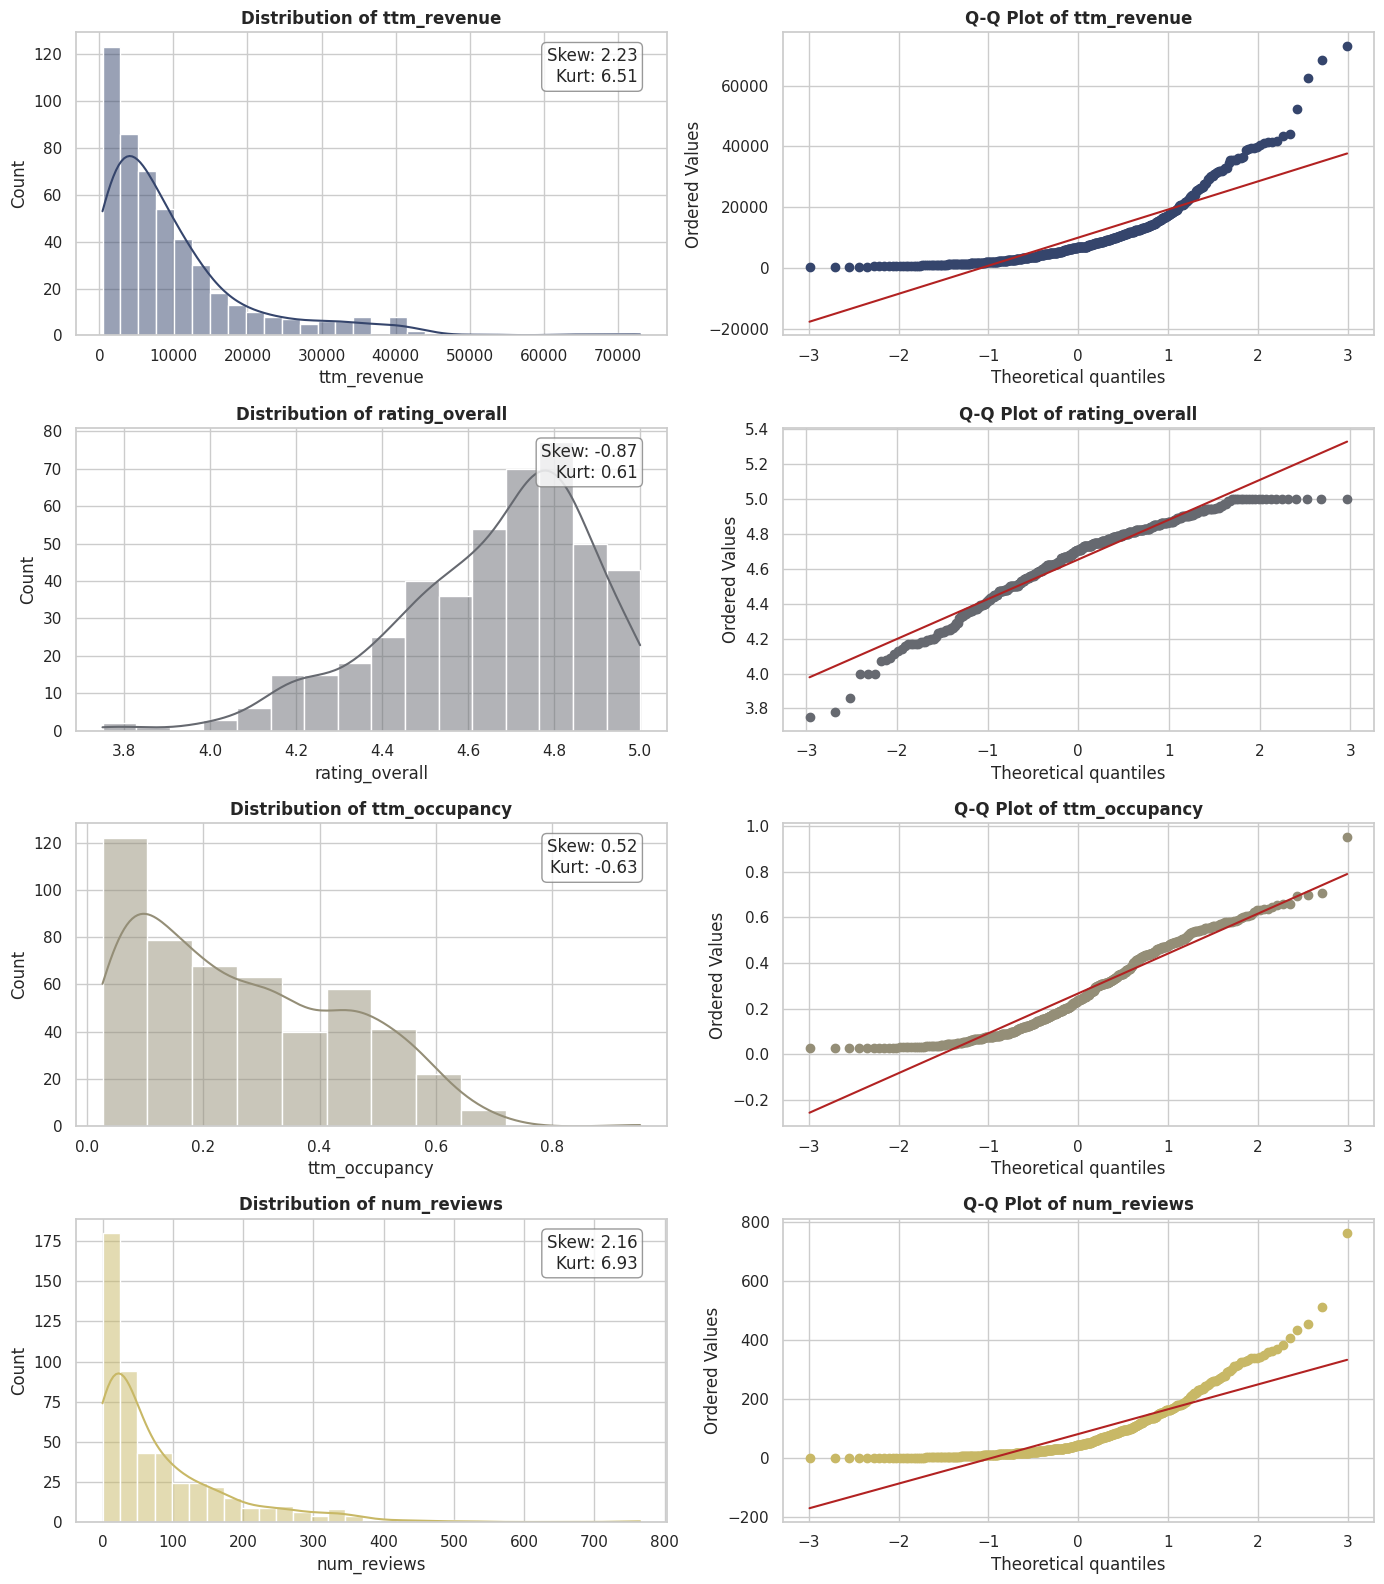

In [28]:
print("\n=== Normality Check ===")

palette = sns.color_palette("cividis", n_colors=len(numeric_vars))

fig, axes = plt.subplots(len(numeric_vars), 2, figsize=(14, 4 * len(numeric_vars)))

for i, col in enumerate(numeric_vars):
    if df_eda[col].isnull().all(): continue

    # Histogram
    sns.histplot(
        df_eda[col].dropna(),
        kde=True,
        ax=axes[i, 0],
        color=palette[i],
        edgecolor="white"
    )
    axes[i, 0].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')

    # Q-Q Plot
    stats.probplot(df_eda[col].dropna(), dist="norm", plot=axes[i, 1])
    axes[i, 1].get_lines()[0].set_markerfacecolor(palette[i])
    axes[i, 1].get_lines()[0].set_markeredgecolor(palette[i])
    axes[i, 1].get_lines()[1].set_color('firebrick')
    axes[i, 1].set_title(f'Q-Q Plot of {col}', fontsize=12, fontweight='bold')

    # Skewness & Kurtosis
    skew = df_eda[col].skew()
    kurt = df_eda[col].kurt()
    axes[i, 0].text(0.95, 0.95, f'Skew: {skew:.2f}\nKurt: {kurt:.2f}',
                    transform=axes[i, 0].transAxes, ha='right', va='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'))

plt.tight_layout()

save_path = os.path.join(output_figure_dir, "normality_check.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"figure saved: {save_path}")
plt.show()

figure saved to: output_figure/ttm_revenue_histogram.png


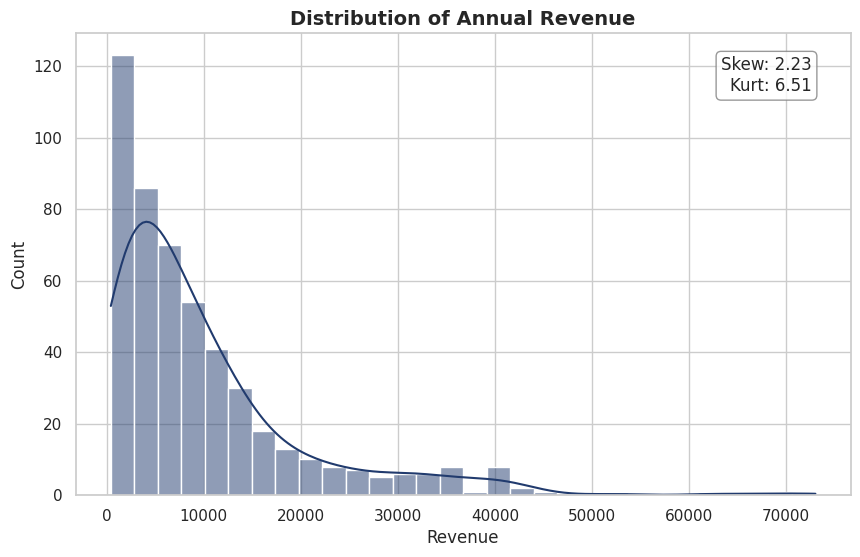

In [29]:
# Histogram ttm_revenue
plt.figure(figsize=(10, 6))

if 'ttm_revenue' in df_eda.columns:
    sns.histplot(
        df_eda['ttm_revenue'],
        kde=True,
        color=sns.color_palette("cividis")[0],
        bins=30
    )

    plt.title('Distribution of Annual Revenue', fontsize=14, fontweight='bold')
    plt.xlabel('Revenue')

    skew = df_eda['ttm_revenue'].skew()
    kurt = df_eda['ttm_revenue'].kurt()

    plt.text(
        0.95, 0.95,
        f"Skew: {skew:.2f}\nKurt: {kurt:.2f}",
        transform=plt.gca().transAxes,
        ha='right', va='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray')
    )

    save_path = os.path.join(output_figure_dir, "ttm_revenue_histogram.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"figure saved to: {save_path}")

    plt.show()

else:
    print("Error: ttm_revenue column not found.")


figure saved to: output_figure/qq_ttm_revenue.png


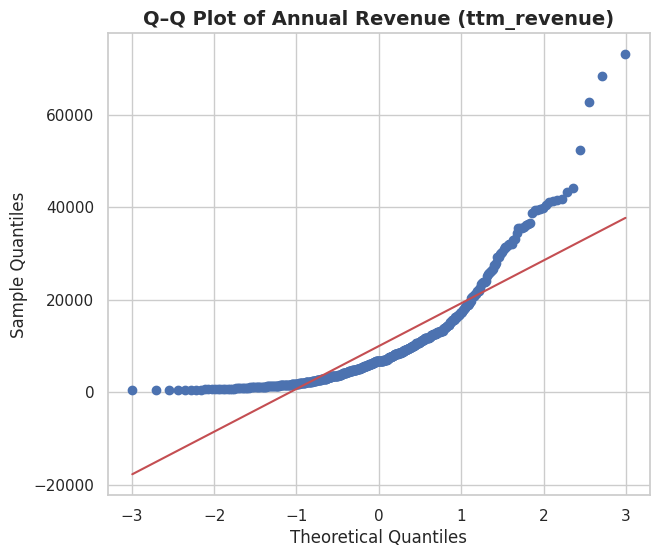

In [30]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import os

# Q–Q Plot: ttm_revenue
plt.figure(figsize=(7, 6))

if 'ttm_revenue' in df_eda.columns:
    stats.probplot(df_eda['ttm_revenue'].dropna(), dist="norm", plot=plt)

    plt.title("Q–Q Plot of Annual Revenue (ttm_revenue)", fontsize=14, fontweight="bold")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")

    save_path = os.path.join(output_figure_dir, "qq_ttm_revenue.png")
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    print(f"figure saved to: {save_path}")

    plt.show()
else:
    print("Error: ttm_revenue column not found.")

Combined figure saved to: output_figure/ttm_revenue_hist_QQ_combined.png


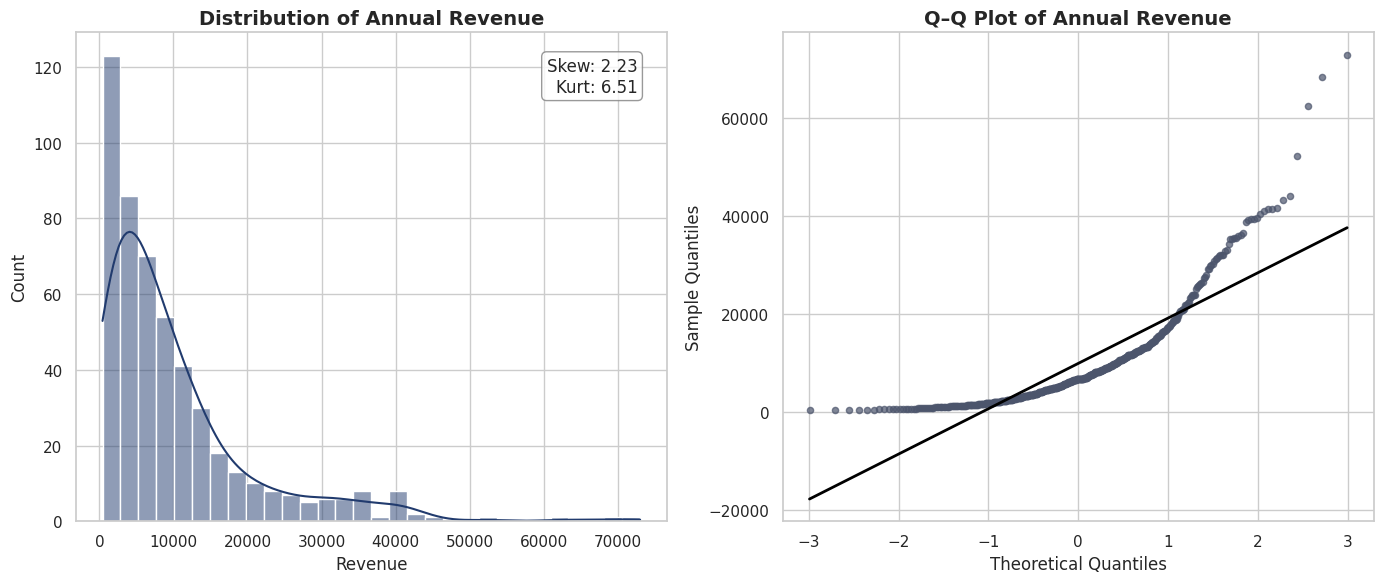

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

ax = axes[0]

sns.histplot(
    df_eda['ttm_revenue'].dropna(),
    kde=True,
    color=sns.color_palette("cividis")[0],
    bins=30,
    ax=ax
)

ax.set_title('Distribution of Annual Revenue', fontsize=14, fontweight='bold')
ax.set_xlabel('Revenue')

# annotate skew/kurt
skew = df_eda['ttm_revenue'].skew()
kurt = df_eda['ttm_revenue'].kurt()

ax.text(
    0.95, 0.95,
    f"Skew: {skew:.2f}\nKurt: {kurt:.2f}",
    transform=ax.transAxes,
    ha='right', va='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray')
)

ax = axes[1]

# Correct way to unpack probplot
(prob_x, prob_y), (slope, intercept, r) = stats.probplot(
    df_eda['ttm_revenue'].dropna(), dist="norm"
)

# Draw scatter
ax.scatter(prob_x, prob_y, s=20, alpha=0.7, color=sns.color_palette("cividis")[1])

# Draw regression line
line_x = prob_x
line_y = slope * line_x + intercept
ax.plot(line_x, line_y, color="black", linewidth=2)

ax.set_title("Q–Q Plot of Annual Revenue", fontsize=14, fontweight="bold")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles")

# Save output
save_path = os.path.join(output_figure_dir, "ttm_revenue_hist_QQ_combined.png")
plt.tight_layout()
plt.savefig(save_path, dpi=300, bbox_inches="tight")

print(f"Combined figure saved to: {save_path}")

plt.show()


figure saved to: output_figure/log_revenue_histogram.png


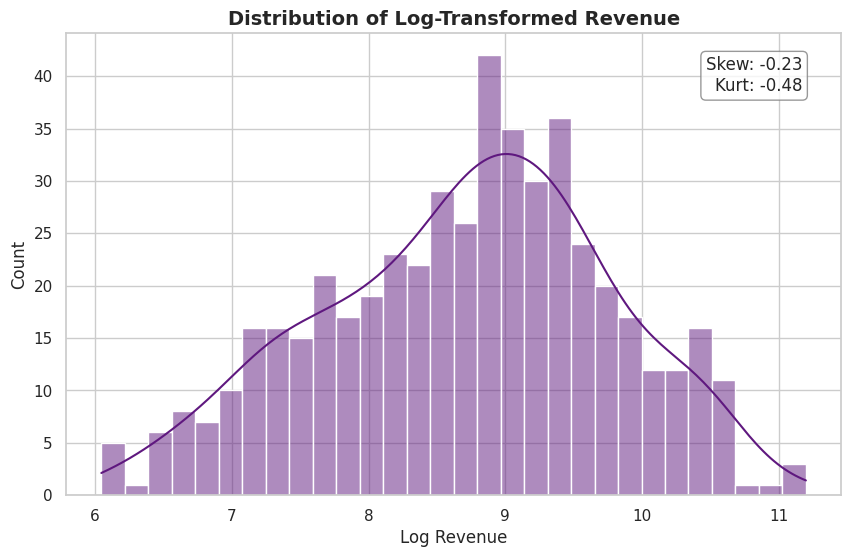

In [32]:
# Histogram log_ttm_revenue
plt.figure(figsize=(10, 6))
if 'log_ttm_revenue' in df_eda.columns:
    sns.histplot(df_eda['log_ttm_revenue'], kde=True, color=sns.color_palette("magma")[1], bins=30)
    plt.title('Distribution of Log-Transformed Revenue', fontsize=14, fontweight='bold')
    plt.xlabel('Log Revenue')

    skew = df_eda['log_ttm_revenue'].skew()
    kurt = df_eda['log_ttm_revenue'].kurt()

    plt.text(
        0.95, 0.95,
        f"Skew: {skew:.2f}\nKurt: {kurt:.2f}",
        transform=plt.gca().transAxes,
        ha='right', va='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray')
    )

    save_path = os.path.join(output_figure_dir, "log_revenue_histogram.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"figure saved to: {save_path}")
    plt.show()
else:
    print("Error: log_ttm_revenue column not found.")

figure saved to: output_figure/qq_log_ttm_revenue.png


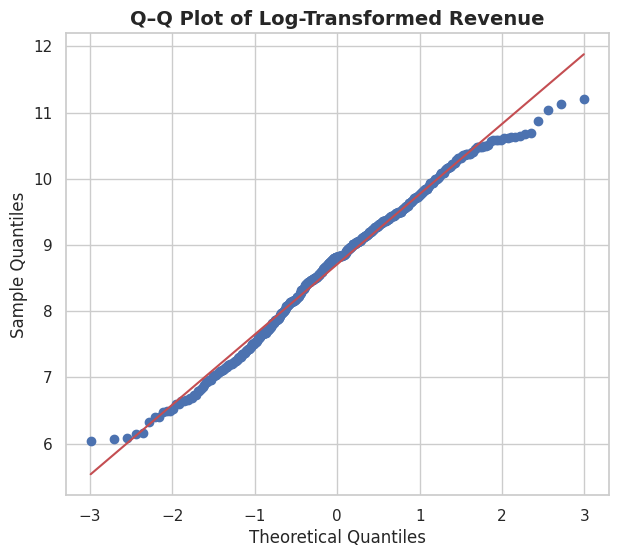

In [33]:
# Q–Q Plot: log_ttm_revenue
plt.figure(figsize=(7, 6))

if 'log_ttm_revenue' in df_eda.columns:
    stats.probplot(df_eda['log_ttm_revenue'].dropna(), dist="norm", plot=plt)

    plt.title("Q–Q Plot of Log-Transformed Revenue", fontsize=14, fontweight="bold")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")

    save_path = os.path.join(output_figure_dir, "qq_log_ttm_revenue.png")
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    print(f"figure saved to: {save_path}")

    plt.show()
else:
    print("Error: log_ttm_revenue column not found.")


Combined figure saved to: output_figure/log_ttm_revenue_hist_QQ_combined.png


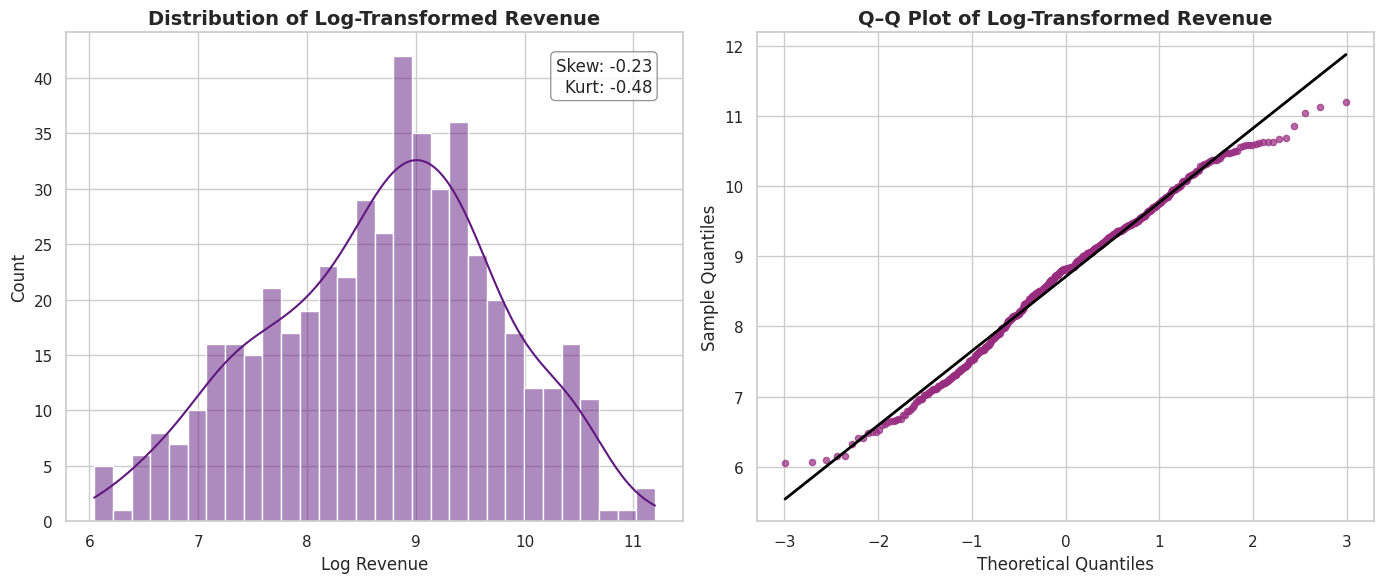

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
ax = axes[0]

sns.histplot(
    df_eda['log_ttm_revenue'].dropna(),
    kde=True,
    color=sns.color_palette("magma")[1],
    bins=30,
    ax=ax
)

ax.set_title('Distribution of Log-Transformed Revenue', fontsize=14, fontweight='bold')
ax.set_xlabel('Log Revenue')

skew = df_eda['log_ttm_revenue'].skew()
kurt = df_eda['log_ttm_revenue'].kurt()

ax.text(
    0.95, 0.95,
    f"Skew: {skew:.2f}\nKurt: {kurt:.2f}",
    transform=ax.transAxes,
    ha='right', va='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray')
)

# Q–Q Plot (right)
ax = axes[1]

(prob_x, prob_y), (slope, intercept, r) = stats.probplot(
    df_eda['log_ttm_revenue'].dropna(), dist="norm"
)

ax.scatter(prob_x, prob_y, s=20, alpha=0.7, color=sns.color_palette("magma")[2])

line_x = prob_x
line_y = slope * line_x + intercept
ax.plot(line_x, line_y, color="black", linewidth=2)

ax.set_title("Q–Q Plot of Log-Transformed Revenue", fontsize=14, fontweight="bold")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles")

save_path = os.path.join(output_figure_dir, "log_ttm_revenue_hist_QQ_combined.png")
plt.tight_layout()
plt.savefig(save_path, dpi=300, bbox_inches="tight")

print(f"Combined figure saved to: {save_path}")

plt.show()


figure saved to: output_figure/comparison_histograms.png


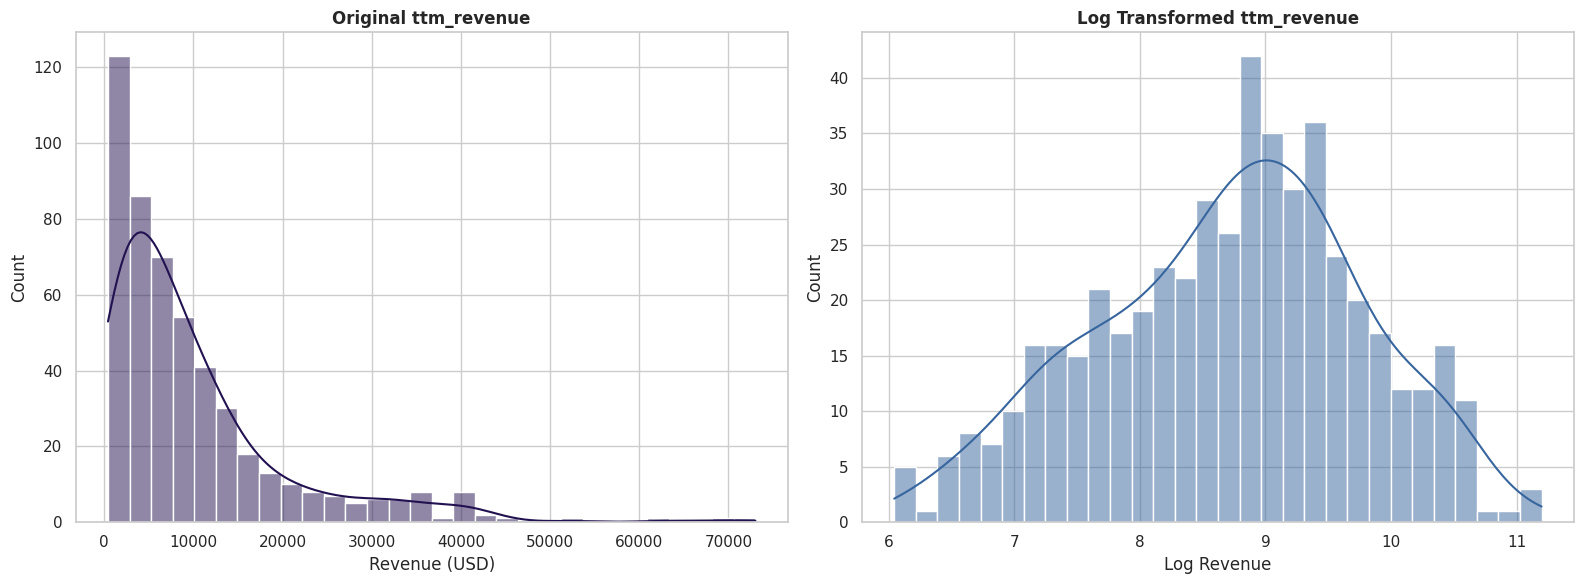

In [35]:
# Histogram of revenue: Raw vs Log
target_col = "ttm_revenue"
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(df_eda[target_col], ax=axes[0], color=sns.color_palette("magma")[0], kde=True, bins=30)
axes[0].set_title(f'Original {target_col}', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Revenue (USD)')

if 'log_ttm_revenue' in df_eda.columns:
    sns.histplot(df_eda['log_ttm_revenue'], ax=axes[1], color=sns.color_palette("mako")[2], kde=True, bins=30)
    axes[1].set_title(f'Log Transformed {target_col}', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Log Revenue')

plt.tight_layout()
save_path = os.path.join(output_figure_dir, "comparison_histograms.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"figure saved to: {save_path}")
plt.show()

## 3.3 Outliers

In [36]:
target_col = "ttm_revenue"

# IQR
Q1 = df_eda[target_col].quantile(0.25)
Q3 = df_eda[target_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_eda[(df_eda[target_col] < lower_bound) | (df_eda[target_col] > upper_bound)]
low_outliers = df_eda[df_eda[target_col] < lower_bound]
high_outliers = df_eda[df_eda[target_col] > upper_bound]
total_outliers = len(low_outliers) + len(high_outliers)
print(f"{target_col}")
print(f"Outliers count: {len(outliers)}")
print(f"  - Too Low: {len(low_outliers)}")
print(f"  - Too High: {len(high_outliers)}")

ttm_revenue
Outliers count: 41
  - Too Low: 0
  - Too High: 41


figure saved to: output_figure/comparison_boxplots.png


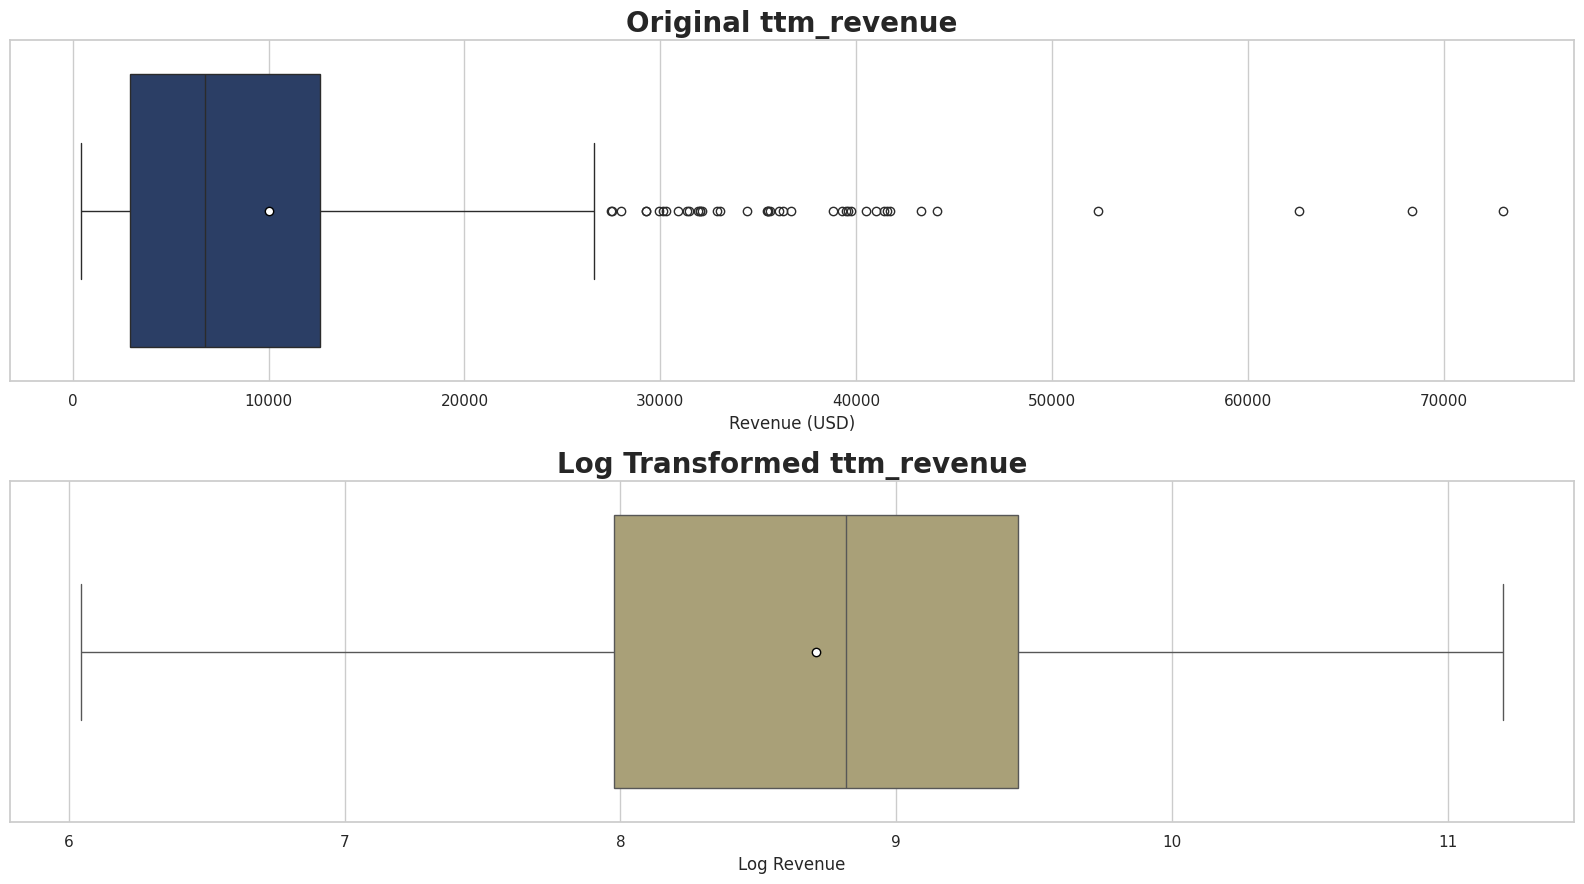

In [37]:
# boxplot of revenue: raw vs log
fig, axes = plt.subplots(2, 1, figsize=(16, 9))

sns.boxplot(
    x=df_eda[target_col],
    ax=axes[0],
    color = sns.color_palette("cividis")[0],
    showmeans=True,
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"}
)
axes[0].set_title(f'Original {target_col}', fontsize=20, fontweight='bold')
axes[0].set_xlabel('Revenue (USD)')

if 'log_ttm_revenue' in df_eda.columns:
    sns.boxplot(
        x=df_eda['log_ttm_revenue'],
        ax=axes[1],
        color = sns.color_palette("cividis")[4],
        showmeans=True,
        meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"}
    )
    axes[1].set_title(f'Log Transformed {target_col}', fontsize=20, fontweight='bold')
    axes[1].set_xlabel('Log Revenue')

plt.tight_layout()
save_path = os.path.join(output_figure_dir, "comparison_boxplots.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"figure saved to: {save_path}")
plt.show()


Correlation Heatmap (in Appendix)

figure saved to: output_figure/correlation_heatmap.png


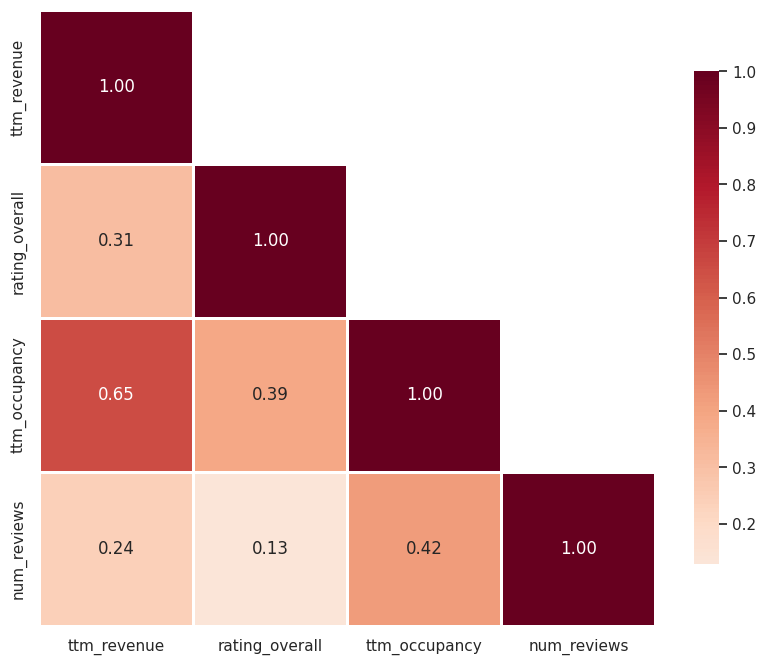

In [38]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df_eda[numeric_vars].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap='RdBu_r',
    fmt=".2f",
    linewidths=1,
    center=0,
    square=True,
    cbar_kws={"shrink": .8},
)
ax = plt.gca()
ax.grid(False)
# plt.title('Correlation Matrix of Key Variables', fontsize=14, fontweight='bold')

save_path = os.path.join(output_figure_dir, "correlation_heatmap.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"figure saved to: {save_path}")
plt.show()

figure saved to: output_figure/correlation_heatmap_key.png


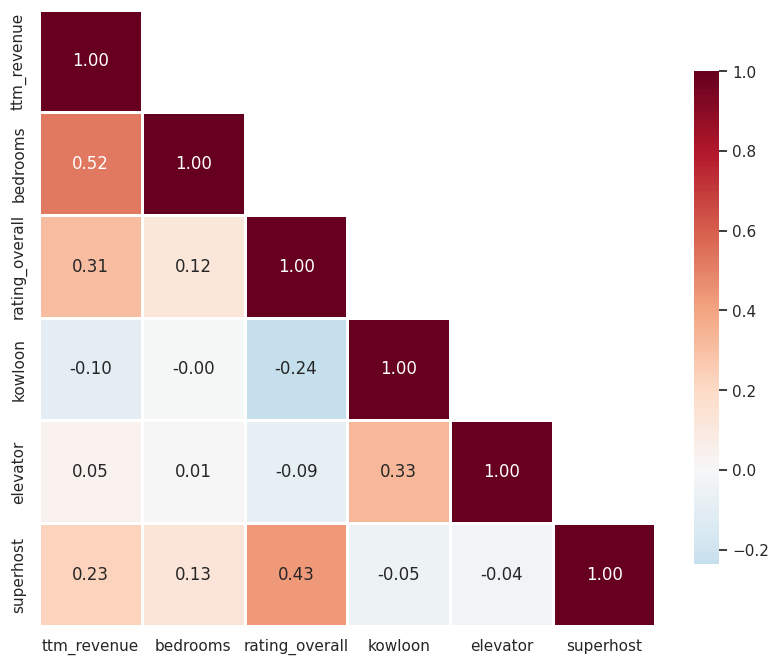

In [39]:
# Correlation Heatmap (including key vars)
corr_vars = [
    "ttm_revenue",
    "bedrooms",
    "rating_overall",
    "kowloon",
    "elevator",
    "superhost",
]

missing_vars = [v for v in corr_vars if v not in df_eda.columns]
if missing_vars:
    print("[Warning] Variables missing in df_eda:", missing_vars)

corr_df = df_eda[corr_vars].copy()

corr_matrix = corr_df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap="RdBu_r",
    fmt=".2f",
    linewidths=1,
    center=0,
    square=True,
    cbar_kws={"shrink": .8},
)

ax = plt.gca()
ax.grid(False)

save_path = os.path.join(output_figure_dir, "correlation_heatmap_key.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"figure saved to: {save_path}")

plt.show()


# Part 4 Further Feature Analysis

## Room Type and Revenue

figure savd to: output_figure/revenue_by_room_type.png


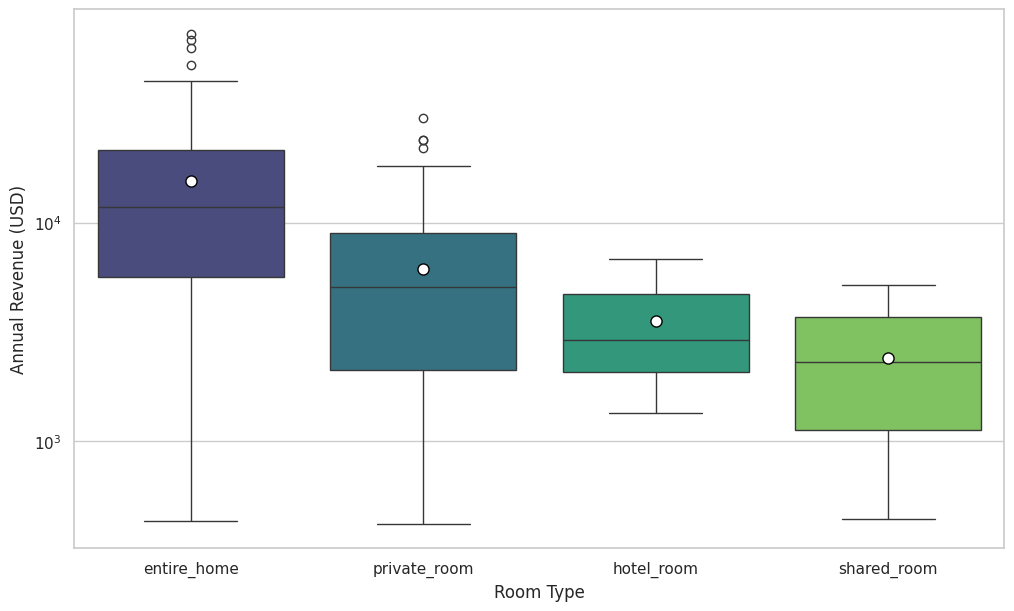

In [40]:
# Room Type and Revenue
plt.figure(figsize=(12, 7))
order = df_eda.groupby('room_type')['ttm_revenue'].median().sort_values(ascending=False).index

sns.boxplot(
    x='room_type',
    y='ttm_revenue',
    data=df_eda,
    order=order,
    palette='viridis',
    showmeans=True,
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"}
)

# plt.title('Revenue Distribution by Room Type', fontsize=14, fontweight='bold')
plt.yscale('log')
plt.ylabel('Annual Revenue (USD)')
plt.xlabel('Room Type')

save_path = os.path.join(output_figure_dir, "revenue_by_room_type.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"figure savd to: {save_path}")
plt.show()

In [41]:
roomtype_revenue_stats = (
    df_eda
    .groupby("room_type")["ttm_revenue"]
    .agg(
        mean="mean",
        median="median",
        q1=lambda x: x.quantile(0.25),
        q3=lambda x: x.quantile(0.75)
    )
    .sort_values(by="median", ascending=False)
)

print("Annual Revenue by Room Type")
display(roomtype_revenue_stats)

Annual Revenue by Room Type


,mean,median,q1,q3
room_type,,,,
entire_home,15468.511416,11805.0,5614.0,21513.00
private_room,6144.778226,5051.5,2121.5,8917.25
hotel_room,3534.538462,2914.0,2065.0,4710.00
shared_room,2395.571429,2299.0,1131.0,3692.00


## Seasonality

In [42]:
monthly_avg = (
    calendar_all.groupby('month')
    .agg(
        avg_revenue=('revenue', 'mean'),
        avg_occupancy=('occupancy', 'mean')
    )
    .reset_index()
)

max_rev_row = monthly_avg.loc[monthly_avg['avg_revenue'].idxmax()]
min_rev_row = monthly_avg.loc[monthly_avg['avg_revenue'].idxmin()]

max_occ_row = monthly_avg.loc[monthly_avg['avg_occupancy'].idxmax()]
min_occ_row = monthly_avg.loc[monthly_avg['avg_occupancy'].idxmin()]

print("\n==== Revenue Seasonality Extremes ====")
print(f"Highest Revenue Month : {int(max_rev_row['month'])}, "
      f"Avg Monthly Revenue per Listing = {max_rev_row['avg_revenue']:.2f}")
print(f"Lowest  Revenue Month : {int(min_rev_row['month'])}, "
      f"Avg Monthly Revenue per Listing = {min_rev_row['avg_revenue']:.2f}")

print("\n==== Occupancy Seasonality Extremes ====")
print(f"Highest Occupancy Month: {int(max_occ_row['month'])}, "
      f"Avg Monthly Occupancy = {max_occ_row['avg_occupancy']:.4f}")
print(f"Lowest  Occupancy Month: {int(min_occ_row['month'])}, "
      f"Avg Monthly Occupancy = {min_occ_row['avg_occupancy']:.4f}")


==== Revenue Seasonality Extremes ====
Highest Revenue Month : 12, Avg Monthly Revenue per Listing = 1741.88
Lowest  Revenue Month : 9, Avg Monthly Revenue per Listing = 94.28

==== Occupancy Seasonality Extremes ====
Highest Occupancy Month: 11, Avg Monthly Occupancy = 0.5274
Lowest  Occupancy Month: 9, Avg Monthly Occupancy = 0.0339


figure savd to: output_figure/Seasonal_Revenue_Trends.png


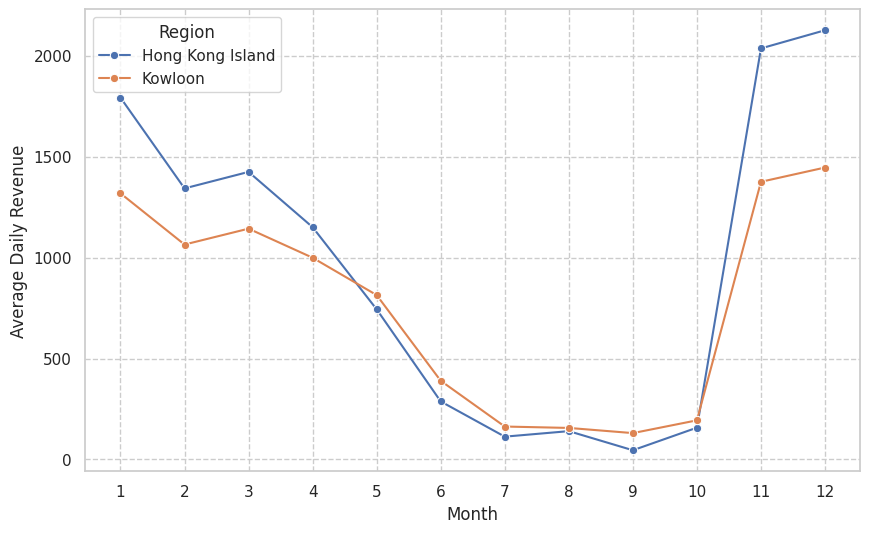

In [43]:
seasonal_trend = calendar_all.groupby(['month', 'region_source'])['revenue'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='revenue', hue='region_source', data=seasonal_trend, marker='o')
# plt.title('Seasonal Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Average Daily Revenue')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--')
plt.legend(title='Region')

save_path = os.path.join(output_figure_dir, "Seasonal_Revenue_Trends.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"figure savd to: {save_path}")
plt.show()

figure savd to: output_figure/Seasonal_Occupancy_Rate_Trends.png


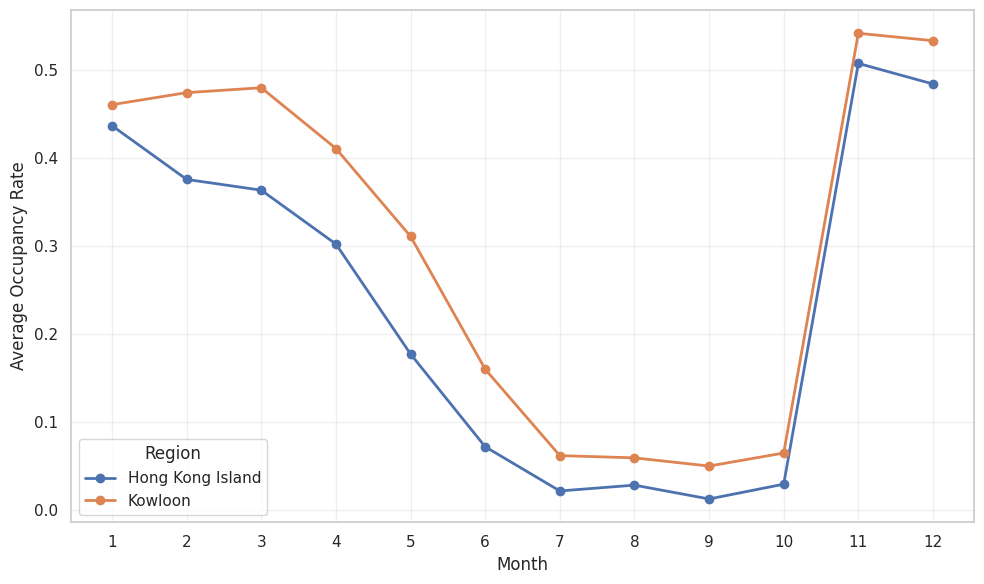

In [44]:
monthly_occupancy = (
    calendar_all.groupby(['month', 'region_source'])
    .agg(mean_occupancy=('occupancy', 'mean'))
    .reset_index()
)

plt.figure(figsize=(10, 6))

for region in monthly_occupancy['region_source'].unique():
    sub_df = monthly_occupancy[monthly_occupancy['region_source'] == region]
    plt.plot(
        sub_df['month'],
        sub_df['mean_occupancy'],
        marker='o',
        linewidth=2,
        label=region
    )

# plt.title('Monthly Average Occupancy Rate by Region', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Occupancy Rate', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(alpha=0.3)
plt.legend(title='Region')
plt.tight_layout()

save_path = os.path.join(output_figure_dir, "Seasonal_Occupancy_Rate_Trends.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"figure savd to: {save_path}")
plt.show()

Combined vertical figure saved to: output_figure/seasonality_revenue_occupancy.png


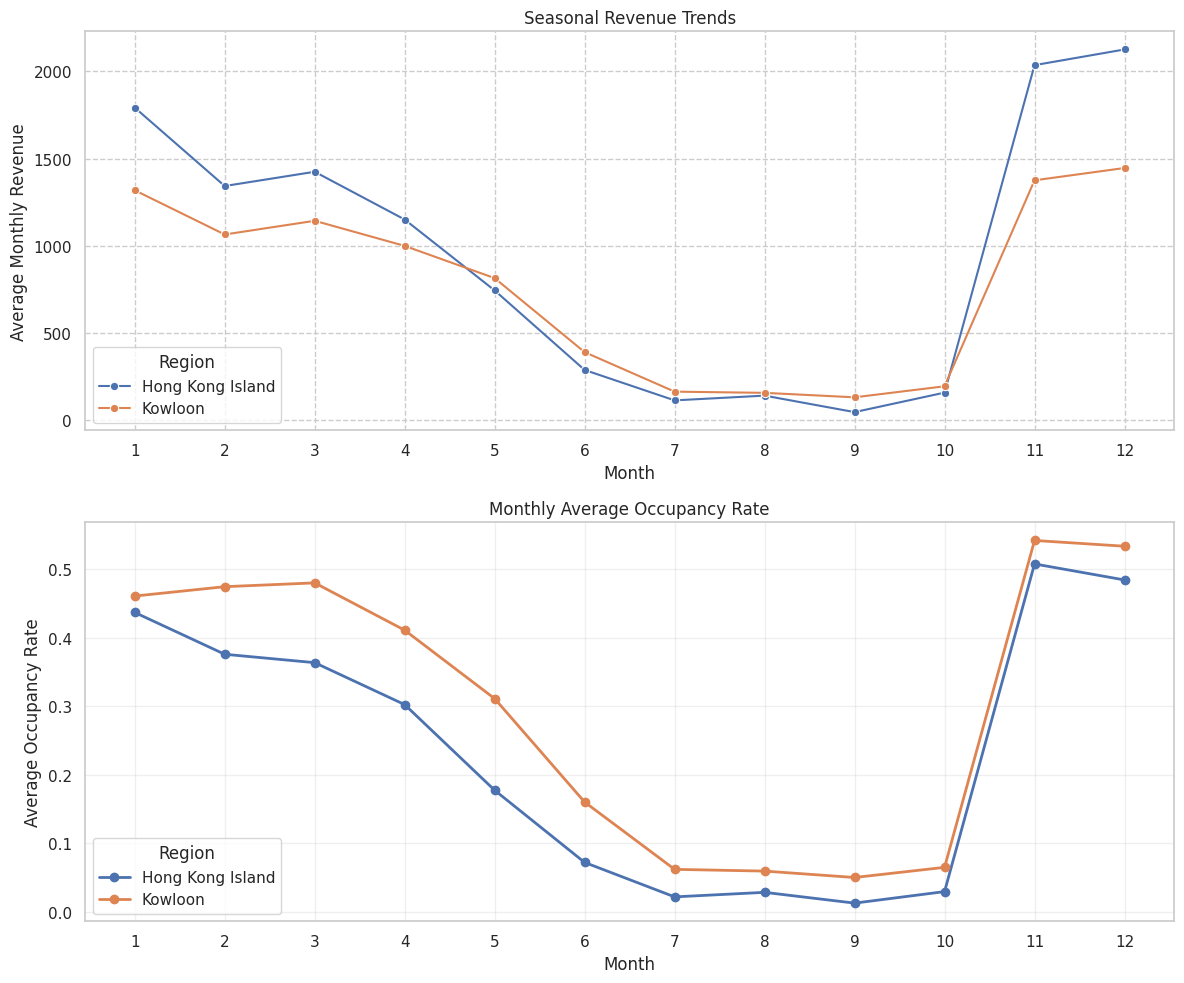

In [45]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

sns.lineplot(
    x='month',
    y='revenue',
    hue='region_source',
    data=seasonal_trend,
    marker='o',
    ax=axes[0]
)

axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Monthly Revenue')
axes[0].set_xticks(range(1, 13))
axes[0].grid(True, linestyle='--')
axes[0].set_title('Seasonal Revenue Trends')
axes[0].legend(title='Region')

for region in monthly_occupancy['region_source'].unique():
    sub_df = monthly_occupancy[monthly_occupancy['region_source'] == region]
    axes[1].plot(
        sub_df['month'],
        sub_df['mean_occupancy'],
        marker='o',
        linewidth=2,
        label=region
    )

axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Occupancy Rate')
axes[1].set_xticks(range(1, 13))
axes[1].grid(alpha=0.3)
axes[1].set_title('Monthly Average Occupancy Rate')
axes[1].legend(title='Region')

plt.tight_layout()

save_path = os.path.join(output_figure_dir,"seasonality_revenue_occupancy.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Combined vertical figure saved to: {save_path}")

plt.show()

## Interactive Map

In [46]:
"""
import folium
import geopandas as gpd
import pandas as pd
import json

boundary_file = "district_boundary_HK.json"
hk_districts_gdf = gpd.read_file(boundary_file)

if hk_districts_gdf.crs is None:
    hk_districts_gdf.set_crs("EPSG:4326", inplace=True)
else:
    hk_districts_gdf = hk_districts_gdf.to_crs("EPSG:4326")

if 'gdf_listings_fe' not in locals():

    temp_df = pd.read_csv("HK_df_listings_fe_clean.csv", low_memory=False)
    gdf_points = gpd.GeoDataFrame(
        temp_df,
        geometry=gpd.points_from_xy(temp_df.longitude, temp_df.latitude),
        crs="EPSG:4326"
    )
else:
    gdf_points = gdf_listings_fe.copy()

joined_gdf = gpd.sjoin(gdf_points, hk_districts_gdf, how="inner", predicate="within")

target_metric = "ttm_avg_rate"
metric_label = "Avg Daily Rate (HKD)"

district_stats = joined_gdf.groupby("District")[target_metric].mean().reset_index()
district_stats.rename(columns={target_metric: "metric_value"}, inplace=True)

hk_map_data = hk_districts_gdf.merge(district_stats, on="District", how="left")
hk_map_data["metric_value"] = hk_map_data["metric_value"].fillna(0)

m = folium.Map(location=[22.3193, 114.1694], zoom_start=11, tiles="cartodb positron")

folium.Choropleth(
    geo_data=hk_map_data,
    data=hk_map_data,
    columns=["District", "metric_value"],
    key_on="feature.properties.District",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name=f"{metric_label} by District",
    nan_fill_color="white"
).add_to(m)

style_function = lambda x: {'fillColor': '#ffffff', 'color':'#000000', 'fillOpacity': 0.1, 'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 'color':'#000000', 'fillOpacity': 0.50, 'weight': 0.1}

folium.GeoJson(
    data=hk_map_data,
    style_function=style_function,
    control=False,
    tooltip=folium.GeoJsonTooltip(
        fields=['District', 'metric_value'],
        aliases=['District Name:', f'{metric_label}:'],
        localize=True,
        sticky=False
    )
).add_to(m)


map_filename = "HK_Interactive_map.html"
m.save(map_filename)
print(f"map saved as: {map_filename}")
m
"""

'\nimport folium\nimport geopandas as gpd\nimport pandas as pd\nimport json\n\nboundary_file = "district_boundary_HK.json"\nhk_districts_gdf = gpd.read_file(boundary_file)\n\nif hk_districts_gdf.crs is None:\n    hk_districts_gdf.set_crs("EPSG:4326", inplace=True)\nelse:\n    hk_districts_gdf = hk_districts_gdf.to_crs("EPSG:4326")\n\nif \'gdf_listings_fe\' not in locals():\n\n    temp_df = pd.read_csv("HK_df_listings_fe_clean.csv", low_memory=False)\n    gdf_points = gpd.GeoDataFrame(\n        temp_df,\n        geometry=gpd.points_from_xy(temp_df.longitude, temp_df.latitude),\n        crs="EPSG:4326"\n    )\nelse:\n    gdf_points = gdf_listings_fe.copy()\n\njoined_gdf = gpd.sjoin(gdf_points, hk_districts_gdf, how="inner", predicate="within")\n\ntarget_metric = "ttm_avg_rate"\nmetric_label = "Avg Daily Rate (HKD)"\n\ndistrict_stats = joined_gdf.groupby("District")[target_metric].mean().reset_index()\ndistrict_stats.rename(columns={target_metric: "metric_value"}, inplace=True)\n\nhk_map_

In [47]:
import folium
import pandas as pd
import geopandas as gpd
from folium.plugins import MarkerCluster
import numpy as np

try:
    df = pd.read_csv("HK_df_listings_fe_clean.csv")
    plot_data = df.dropna(subset=['ttm_revenue', 'rating_overall', 'latitude', 'longitude']).copy()

    plot_data = gpd.GeoDataFrame(
        plot_data,
        geometry=gpd.points_from_xy(plot_data.longitude, plot_data.latitude),
        crs="EPSG:4326"
    )

    max_rev = plot_data['ttm_revenue'].max()

    try:
        hk_districts_gdf = gpd.read_file("district_boundary_HK.json")
    except Exception as e:
        hk_districts_gdf = None
        print(f"Warning: Boundary file not loaded. {e}")

except Exception as e:
    print(f"Fatal Error: Data context (plot_data) not found. Please ensure HK_df_listings_fe_clean.csv is accessible. Error: {e}")

# draw the map
m_dot = folium.Map(location=[22.28, 114.18], zoom_start=12, tiles="cartodb positron")

if hk_districts_gdf is not None:
    folium.GeoJson(
        hk_districts_gdf,
        style_function=lambda x: {'color': '#999999', 'weight': 1, 'fillOpacity': 0}
    ).add_to(m_dot)

## rating
def get_color(rating):
    if rating >= 4.85:       # Top 20%
        return '#d73027'
    elif rating >= 4.70:     # above the median
        return '#fc8d59'
    elif rating >= 4.50:
        return '#fee090'
    else:                    # Bottom 25%
        return '#4575b4'

## revenue
max_rev = plot_data['ttm_revenue'].max() if 'ttm_revenue' in plot_data.columns and plot_data['ttm_revenue'].max() > 0 else 1

for idx, row in plot_data.iterrows():
    radius = 3 + (row['ttm_revenue'] / max_rev) * 5
    color = get_color(row['rating_overall'])

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=radius,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.8,
        weight=0.5,
        tooltip=f"{row['listing_name']} (Rating: {row['rating_overall']})",
        popup=folium.Popup(f"""
            <b>{row['listing_name']}</b><br>
            Rating: {row['rating_overall']}<br>
            Revenue: ${row['ttm_revenue']:,.0f} USD<br>
            Beds: {row['bedrooms']}
        """, max_width=250)
    ).add_to(m_dot)

legend_html = '''
<div style="
    position: fixed;
    bottom: 30px;
    left: 30px;
    z-index: 9999;
    font-size: 12px;
">
    <!-- 1. Color legend -->
    <div style="
        background-color: white;
        border: 1px solid #999999;
        border-radius: 6px;
        box-shadow: 0 0 6px rgba(0,0,0,0.15);
        padding: 8px 10px;
        margin-bottom: 6px;
        opacity: 0.95;
        width: 230px;
    ">
        <b>1. Color: Overall Rating</b><br>
        <i style="background:#d73027;width:10px;height:10px;display:inline-block;border-radius:50%;margin-right:4px;"></i> ≥ 4.85 (Excellent)<br>
        <i style="background:#fc8d59;width:10px;height:10px;display:inline-block;border-radius:50%;margin-right:4px;"></i> 4.70–4.85 (Very Good)<br>
        <i style="background:#fee090;width:10px;height:10px;display:inline-block;border-radius:50%;margin-right:4px;"></i> 4.50–4.70 (Good)<br>
        <i style="background:#4575b4;width:10px;height:10px;display:inline-block;border-radius:50%;margin-right:4px;"></i> &lt; 4.50 (Average / Low)<br>
    </div>

    <!-- 2. Size legend -->
    <div style="
        background-color: white;
        border: 1px solid #999999;
        border-radius: 6px;
        box-shadow: 0 0 6px rgba(0,0,0,0.15);
        padding: 8px 10px;
        opacity: 0.95;
        width: 230px;
    ">
        <b>2. Size: Annual Revenue (USD)</b><br>
        <i style="background:grey;width:14px;height:14px;display:inline-block;border-radius:50%;margin-right:4px;"></i> &gt; $24,000 (Very High)<br>
        <i style="background:grey;width:11px;height:11px;display:inline-block;border-radius:50%;margin-right:4px;"></i> $12,500–$24k (High)<br>
        <i style="background:grey;width:8px;height:8px;display:inline-block;border-radius:50%;margin-right:4px;"></i> $6,700–$12.5k (Medium)<br>
        <i style="background:grey;width:6px;height:6px;display:inline-block;border-radius:50%;margin-right:4px;"></i> &lt; $6,700 (Low)<br>
    </div>
</div>
'''

m_dot.get_root().html.add_child(folium.Element(legend_html))

output_dot_map = "Interactive_map_Rating_Revenue.html"
m_dot.save(output_dot_map)
print(f"Interactive dot map has been saved as: {output_dot_map}")
m_dot

Interactive dot map has been saved as: Interactive_map_Rating_Revenue.html


## Top 10 Amenities

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

def clean_amenities(text):
    if pd.isna(text):
        return ""
    text = text.replace('[', '').replace(']', '').replace('"', '').replace("'", "")
    return text.strip()

df_listings_fe['amenities_clean'] = df_listings_fe['amenities'].apply(clean_amenities)

vectorizer = CountVectorizer(
    tokenizer=lambda x: x.split(','),
    binary=True,
    max_features=20
)

amenities_matrix = vectorizer.fit_transform(df_listings_fe['amenities_clean'])

amenities_sum = amenities_matrix.sum(axis=0)
amenities_freq = [
    (word, amenities_sum[0, idx])
    for word, idx in vectorizer.vocabulary_.items()
]

amenities_freq = sorted(amenities_freq, key=lambda x: x[1], reverse=True)

figure savd to: output_figure/Top_15_Most_Common_Amenities.png


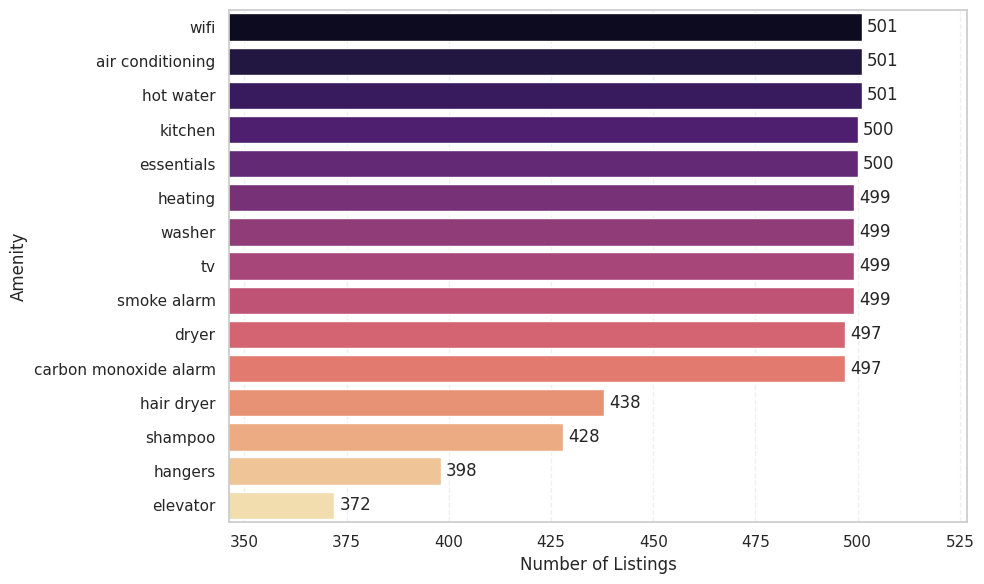

In [49]:
top_n = 15
top_amenities = [x[0].strip() for x in amenities_freq[:top_n]]
top_counts = [int(x[1]) for x in amenities_freq[:top_n]]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_counts, y=top_amenities, palette='magma')

# plt.title('Top 15 Most Common Amenities', fontsize=14)
plt.xlabel('Number of Listings', fontsize=12)
plt.ylabel('Amenity', fontsize=12)

min_cnt = min(top_counts)
max_cnt = max(top_counts)
margin = max(5, (max_cnt - min_cnt) * 0.2)
plt.xlim(min_cnt - margin, max_cnt + margin)

for i, (cnt, amen) in enumerate(zip(top_counts, top_amenities)):
    ax.text(
        cnt + margin * 0.05,
        i,
        str(cnt),
        va='center'
    )

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()

save_path = os.path.join(output_figure_dir, "Top_15_Most_Common_Amenities.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"figure savd to: {save_path}")
plt.show()


# Part 5 Regression Analysis

In [50]:
import statsmodels.formula.api as smf
import numpy as np

df_listings_fe["log_num_reviews"] = np.log1p(df_listings_fe["num_reviews"])

# regression model (OLS)
model1 = """
log_ttm_revenue ~ elevator
                + superhost
                + bedrooms
                + C(room_type)
                + kowloon
"""

model_revenue = smf.ols(formula=model1, data=df_listings_fe).fit()

print(model_revenue.summary())


                            OLS Regression Results                            
Dep. Variable:        log_ttm_revenue   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     48.52
Date:                Sat, 13 Dec 2025   Prob (F-statistic):           2.95e-52
Time:                        03:36:32   Log-Likelihood:                -602.17
No. Observations:                 498   AIC:                             1220.
Df Residuals:                     490   BIC:                             1254.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [51]:
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
import os

custom_order = [
    'elevator',
    'superhost',
    'bedrooms',
    'kowloon',
    'C(room_type)[T.private_room]',
    'C(room_type)[T.shared_room]',
    'C(room_type)[T.hotel_room]',
    'Intercept'
]

st = Stargazer([model_revenue])
st.title("Effect of Elevator and Superhost Status on Annual Revenue")
st.show_deprecation_warning = False

st.covariate_order(custom_order)

html_table = st.render_html()
output_path = os.path.join(os.getcwd(), "output_table/revenue_OLS.html")
with open(output_path, "w") as f:
     f.write(html_table)
print(f"Stargazer table saved to: {output_path}")

HTML(html_table)

Stargazer table saved to: /content/MSSP-6070-YuzhenYang/data/data_final_project/output_table/revenue_OLS.html
